Saved: metrics_logloss_colorful.pdf and metrics_logloss_colorful.png


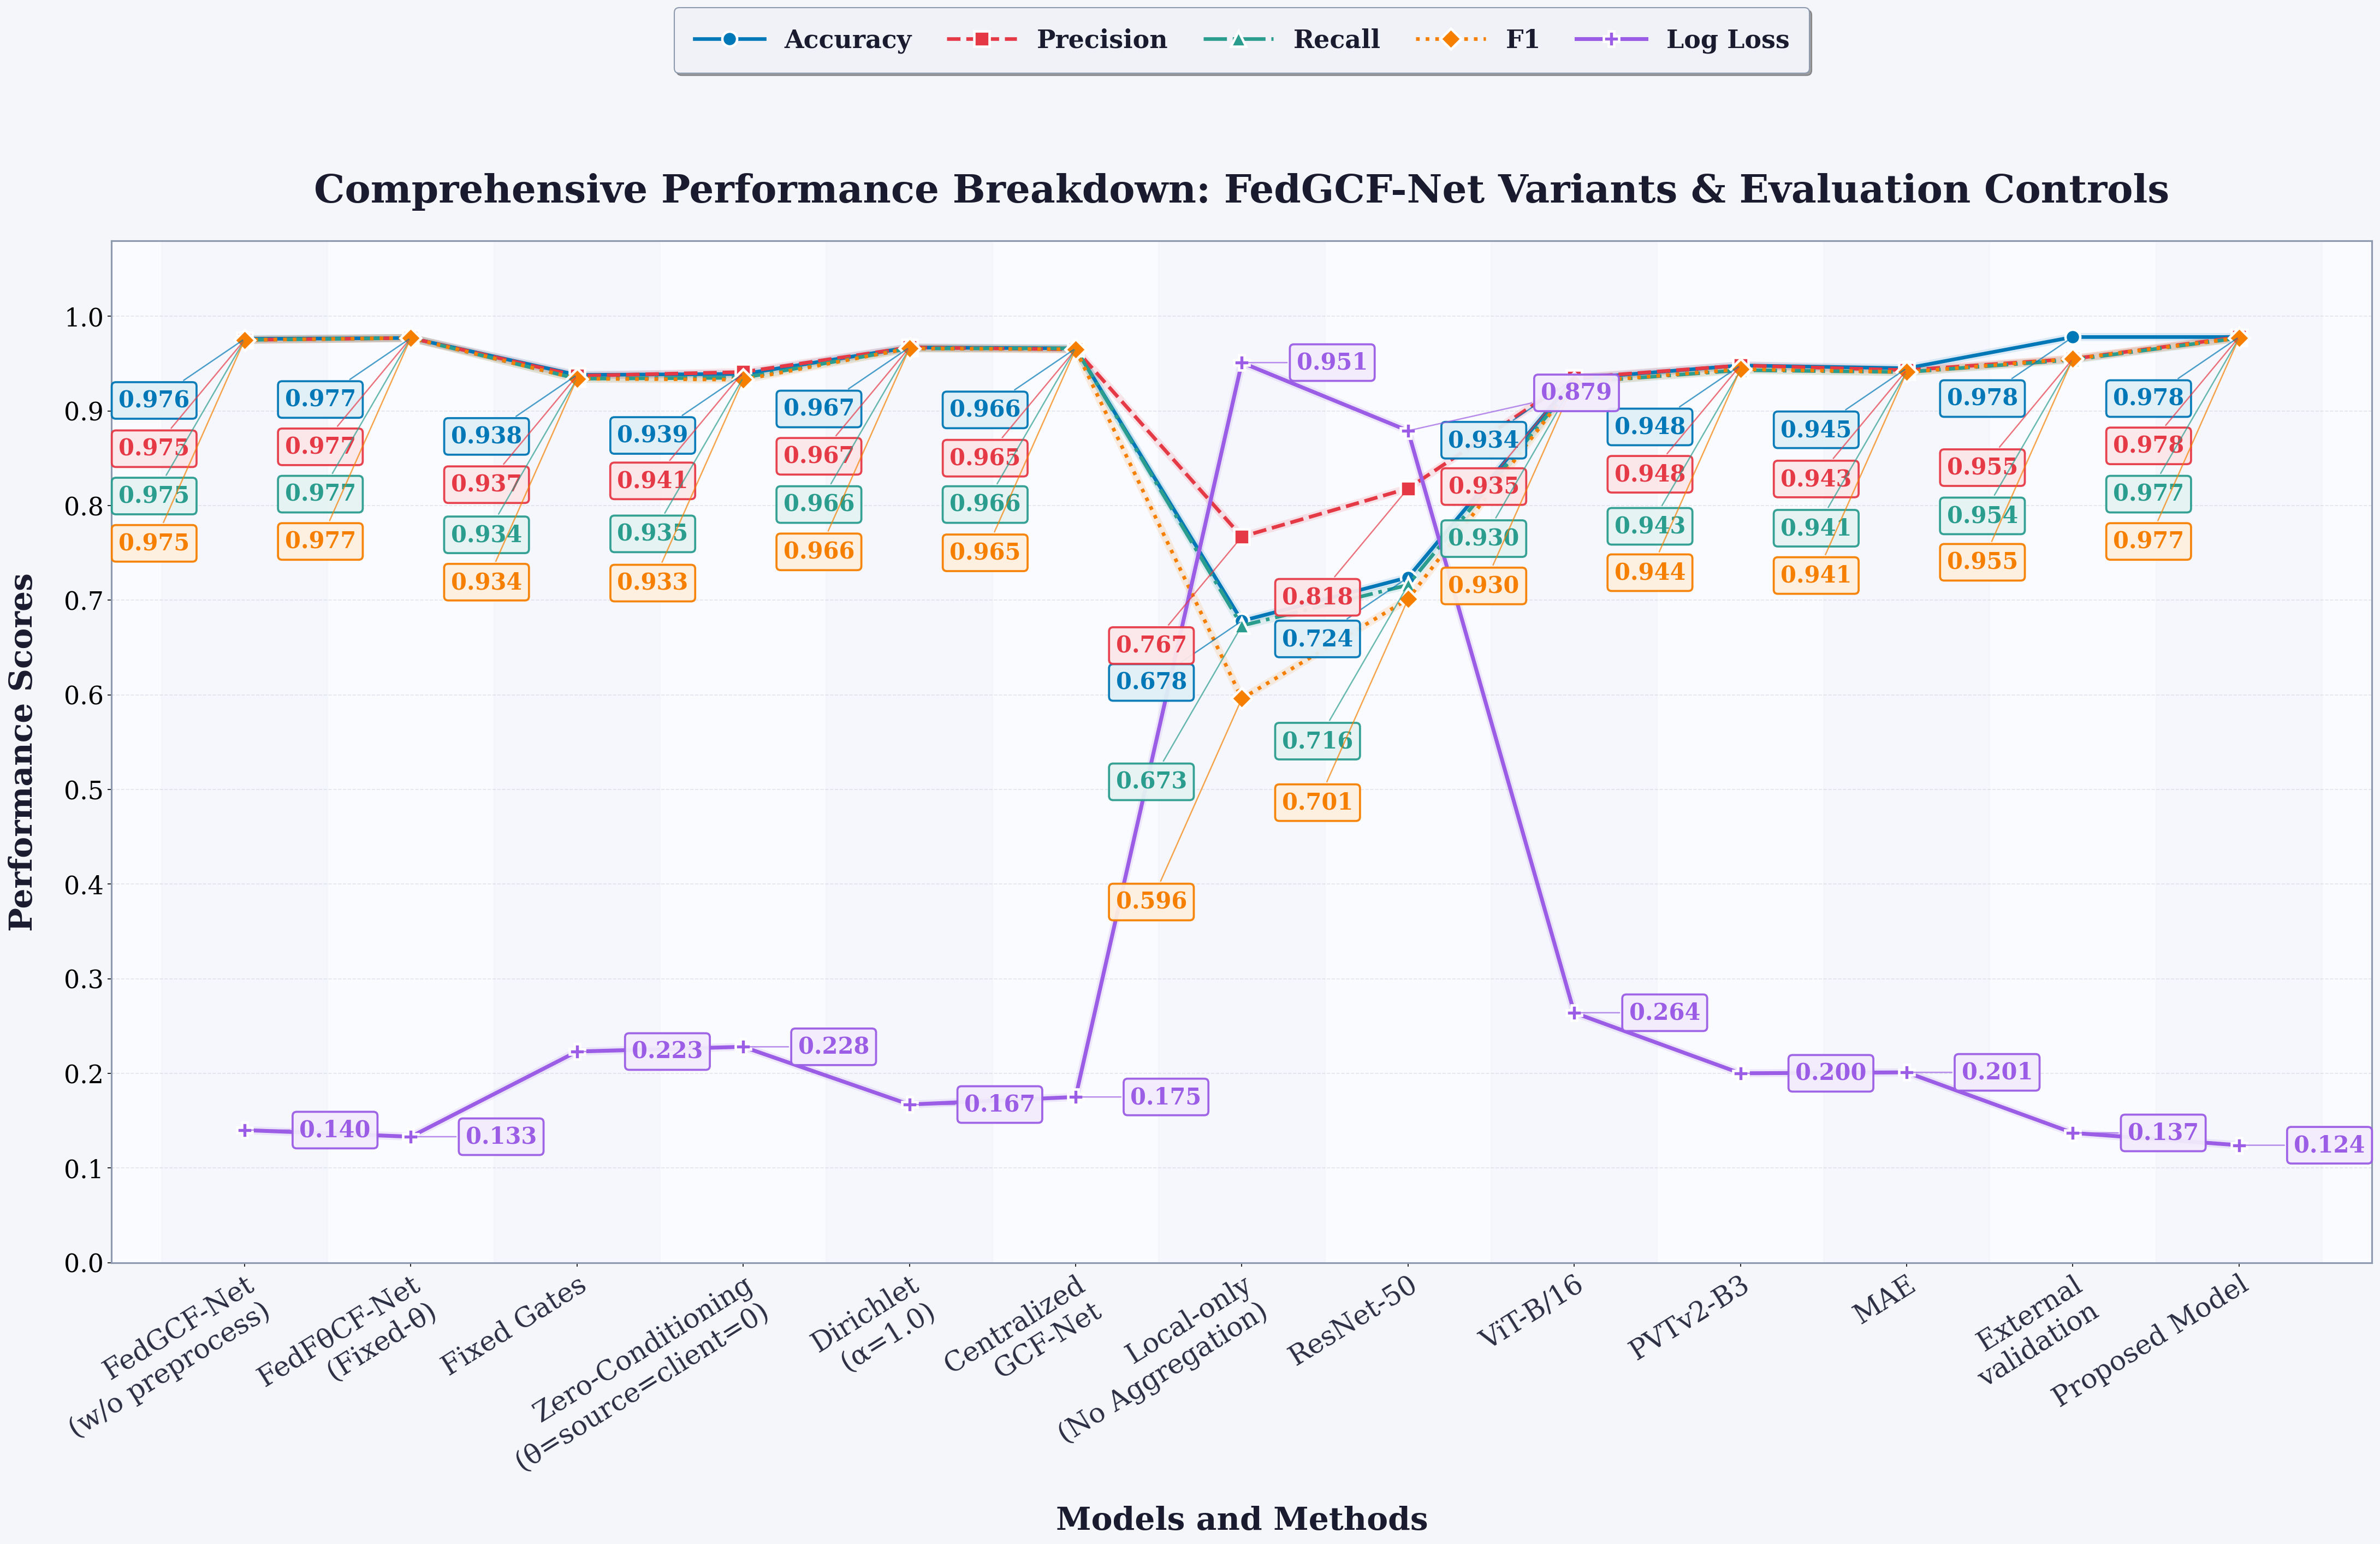

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import textwrap

# -----------------------------
# 1) CONFIG / STYLE
# -----------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "font.size": 20,

    "axes.titlesize": 34,
    "axes.titleweight": "bold",
    "axes.labelsize": 28,
    "axes.labelweight": "bold",

    "xtick.labelsize": 24,
    "ytick.labelsize": 22,
    "legend.fontsize": 22,

    "axes.linewidth": 1.8,
    "grid.alpha": 0.25,

    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})


def wrap_keep_newlines(label: str, width: int = 16) -> str:
    parts = label.split("\n")
    wrapped_parts = [
        textwrap.fill(p, width=width, break_long_words=False, break_on_hyphens=False)
        for p in parts
    ]
    return "\n".join(wrapped_parts)


def value_box_style(edge_color):
    # Slightly tinted facecolor based on edge color
    r, g, b = mcolors.to_rgb(edge_color)
    fc_color = (r * 0.12 + 0.88, g * 0.12 + 0.88, b * 0.12 + 0.88, 0.93)
    return dict(
        boxstyle="round,pad=0.30,rounding_size=0.18",
        fc=fc_color,
        ec=edge_color,
        lw=1.8,
        alpha=0.95,
    )


# -----------------------------
# 2) DATA
# -----------------------------
methods = [
    "FedGCF-Net\n(w/o preprocess)", "FedFθCF-Net\n(Fixed-θ)", "Fixed Gates",
    "Zero-Conditioning\n(θ=source=client=0)", "Dirichlet\n(α=1.0)",
    "Centralized\nGCF-Net", "Local-only\n(No Aggregation)", "ResNet-50",
    "ViT-B/16", "PVTv2-B3", "MAE", "External\nvalidation", "Proposed Model"
]
x = np.arange(len(methods))

score_metrics = {
    "Accuracy":  [0.976, 0.977, 0.938, 0.939, 0.967, 0.966, 0.678, 0.724, 0.934, 0.948, 0.945, 0.978, 0.978],
    "Precision": [0.975, 0.977, 0.937, 0.941, 0.967, 0.965, 0.767, 0.818, 0.935, 0.948, 0.943, 0.955, 0.978],
    "Recall":    [0.975, 0.977, 0.934, 0.935, 0.966, 0.966, 0.673, 0.716, 0.930, 0.943, 0.941, 0.954, 0.977],
    "F1":        [0.975, 0.977, 0.934, 0.933, 0.966, 0.965, 0.596, 0.701, 0.930, 0.944, 0.941, 0.955, 0.977],
}

logloss = np.array(
    [0.140, 0.133, 0.223, 0.228, 0.167, 0.175, 0.951, 0.879, 0.264,
     0.200, 0.201, 0.137, 0.124],
    dtype=float
)

# More vibrant, distinct palette
colors_palette = ['#0077B6', '#E63946', '#2A9D8F', '#F77F00']   # metrics
linestyles = ['-', '--', '-.', ':']
logloss_color = '#9B5DE5'                                      # logloss

markers = ['o', 's', '^', 'D']
logloss_marker = 'P'

metric_names = list(score_metrics.keys())


# -----------------------------
# 3) PLOT SETUP
# -----------------------------
fig, ax = plt.subplots(figsize=(30, 24), dpi=150)

# Soft background
ax.set_facecolor('#FAFBFF')
fig.patch.set_facecolor('#F5F6FA')

ax.set_title(
    "Comprehensive Performance Breakdown: FedGCF-Net Variants & Evaluation Controls",
    pad=34, fontweight="bold", color='#1B1B2F'
)
ax.set_ylabel("Performance Scores", labelpad=22, color='#1B1B2F')
ax.set_xlabel("Models and Methods", labelpad=26, color='#1B1B2F')

ticks = np.linspace(0.0, 1.0, 11)
ax.set_yticks(ticks)
ax.set_yticklabels([f"{v:.1f}" for v in ticks])
ax.set_ylim(0.0, 1.08)
ax.set_xlim(-0.80, len(methods) - 0.20)

# Enhanced grid
ax.grid(True, axis="y", linestyle="--", linewidth=0.8, alpha=0.30, color='#B0B0C0')
ax.grid(False, axis="x")

# Alternating vertical bands for readability
for i in range(len(methods)):
    if i % 2 == 0:
        ax.axvspan(i - 0.5, i + 0.5, color='#E8ECF4', alpha=0.25, zorder=0)

# Spine styling
for spine in ax.spines.values():
    spine.set_color('#8D99AE')
    spine.set_linewidth(1.5)


# -----------------------------
# 4) LINES (with glow effect)
# -----------------------------
lines = []
for i, m in enumerate(metric_names):
    y = np.array(score_metrics[m], dtype=float)

    # Glow/background line
    ax.plot(
        x, y,
        color=colors_palette[i],
        linewidth=7,
        alpha=0.12,
        zorder=3
    )

    # Main line
    ln = ax.plot(
        x, y,
        color=colors_palette[i],
        linestyle=linestyles[i],
        marker=markers[i],
        linewidth=3.2,
        markersize=13,
        markeredgecolor="white",
        markeredgewidth=2.2,
        label=m,
        zorder=5
    )[0]
    lines.append(ln)

# Logloss line (with glow)
ax.plot(
    x, logloss,
    color=logloss_color,
    linewidth=7,
    alpha=0.12,
    zorder=3
)

ll_line = ax.plot(
    x, logloss,
    color=logloss_color,
    linestyle="-",
    marker=logloss_marker,
    linewidth=3.4,
    markersize=13.5,
    markeredgecolor="white",
    markeredgewidth=2.2,
    label="Log Loss",
    zorder=5
)[0]
lines.append(ll_line)


# -----------------------------
# 5) VALUE BOXES (inside plot, below curves)
# -----------------------------
BASE_DROP = 0.065   # starting vertical drop
ROW_GAP   = 0.050   # gap between stacked metric boxes

X_OFF_METRIC = -0.33    # shift metric boxes to left
X_OFF_LOG    =  0.33    # shift logloss boxes to right

ymin, ymax = ax.get_ylim()

for xi in x:
    # 4 stacked metric labels
    for mi, m in enumerate(metric_names):
        y0 = float(score_metrics[m][xi])

        # try placing below
        y_text = y0 - (BASE_DROP + mi * ROW_GAP)

        # if too low, flip above
        if y_text < ymin + 0.03:
            y_text = y0 + (BASE_DROP + mi * ROW_GAP)

        # clamp inside axis
        y_text = min(max(y_text, ymin + 0.03), ymax - 0.03)

        c = colors_palette[mi]
        ax.annotate(
            f"{y0:.3f}",
            xy=(xi, y0),
            xytext=(xi + X_OFF_METRIC, y_text),
            textcoords="data",
            ha="right",
            va="center",
            fontsize=20,
            fontweight="bold",
            color=c,
            bbox=value_box_style(c),
            arrowprops=dict(arrowstyle="-", color=c, lw=1.2, alpha=0.70),
            zorder=20,
            clip_on=False
        )

    # --------------------------
    # LOGLOSS LABEL
    # special case for ResNet-50 (index 7) to make 0.879 visible
    # --------------------------
    y_ll = float(logloss[xi])
    y_ll_text = min(max(y_ll, ymin + 0.04), ymax - 0.04)

    x_off = X_OFF_LOG
    extra_y_shift = 0.0

    if xi == 7:  # ResNet-50
        x_off = 0.80        # push further to the right
        extra_y_shift = 0.04  # and slightly up

    y_ll_text = min(max(y_ll_text + extra_y_shift, ymin + 0.04), ymax - 0.04)

    ax.annotate(
        f"{y_ll:.3f}",
        xy=(xi, y_ll),
        xytext=(xi + x_off, y_ll_text),
        textcoords="data",
        ha="left",
        va="center",
        fontsize=20,
        fontweight="bold",
        color=logloss_color,
        bbox=value_box_style(logloss_color),
        arrowprops=dict(arrowstyle="-", color=logloss_color, lw=1.2, alpha=0.70),
        zorder=25,          # draw above other elements
        clip_on=False
    )


# -----------------------------
# 6) X LABELS + LEGEND + SAVE
# -----------------------------
wrapped_methods = [wrap_keep_newlines(m, width=16) for m in methods]
ax.set_xticks(x)
ax.set_xticklabels(
    wrapped_methods,
    rotation=32,
    ha="right",
    rotation_mode="anchor",
    color='#2B2D42'
)

leg = ax.legend(
    handles=lines,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.24),
    ncol=5,
    frameon=True,
    fancybox=True,
    borderpad=0.8,
    columnspacing=1.4,
    handlelength=2.8,
    edgecolor='#8D99AE',
    facecolor='#F0F2F8',
    shadow=True,
)
leg.set_zorder(50)
for text in leg.get_texts():
    text.set_fontweight('bold')
    text.set_color('#1B1B2F')

plt.tight_layout()
plt.subplots_adjust(top=0.82, bottom=0.30, left=0.06, right=0.98)

plt.savefig("metrics_logloss_colorful.pdf", bbox_inches="tight", pad_inches=0.05)
plt.savefig("metrics_logloss_colorful.png", dpi=300, bbox_inches="tight", pad_inches=0.05)

print("Saved: metrics_logloss_colorful.pdf and metrics_logloss_colorful.png")
plt.show()
